This file shows a different usage from using command line to run main.py

In [1]:
import tensorflow as tf
import numpy as np
import display_tools
from models import VitAug
from data_utilis import spilt_data
from process import Processor

2024-07-23 18:17:35.556793: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-23 18:17:35.619120: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 18:17:35.619153: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 18:17:35.619188: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-23 18:17:35.633109: I tensorflow/core/platform/cpu_feature_g

In [2]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Prepare Data

In [3]:
(images_train, labels_train), (images_test, labels_test) = tf.keras.datasets.cifar10.load_data()    
images = np.concatenate((images_train, images_test), axis=0)
labels = np.concatenate((labels_train,labels_test), axis=0)
data_train, data_val, data_test = spilt_data((images, labels))

In [4]:
dataset = spilt_data((images_train, labels_train))
dataset_dev = (dataset[0],dataset[1])

2024-07-23 18:17:42.182265: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30570 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080 SUPER, pci bus id: 0000:31:00.0, compute capability: 8.9


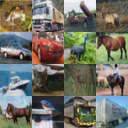

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
display_tools.visualise_mixup(images_train[0:16], (4,4), 'beta', alpha = 1.0)

# Train the Model

## model paramters

In [6]:
# two model configurations
model_param1 = {
    'sampling_method': 'beta',
    'image_size': 32,
    'patch_size': 4,
    'num_classes': 10,
    'dim': 256,
    'depth': 8,
    'num_heads': 8,
    'mlp_dim': 512,
    'dropout': 0.2,
    'alpha': 1.0
}

model_param2 = {
    'sampling_method': 'uniform',
    'image_size': 32,
    'patch_size': 4,
    'num_classes': 10,
    'dim': 256,
    'depth': 8,
    'num_heads': 8,
    'mlp_dim': 512,
    'dropout': 0.2,
    'uniform_range': (0.0,1.0)
}

## training paramters

In [7]:
num_epochs = 10
batch_size = 128
learning_rate = 0.001

## augmentation method 1 (beta)

In [8]:
model = VitAug(**model_param1)

In [9]:
processor = Processor(
    model=model,
    data_train=data_train,
    data_test=data_test,
    data_val=data_val,
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_epochs=num_epochs
)

In [10]:
processor.train()

start: training, with sampling method beta


2024-07-23 18:17:46.449819: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x124fe3f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-23 18:17:46.449836: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 SUPER, Compute Capability 8.9
2024-07-23 18:17:46.454458: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-23 18:17:46.467771: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2024-07-23 18:17:46.594473: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 1, train:: time: 124.319s, loss: 2.277, aug_accuracy: 10.710%                     --- test:: time: 3.050s, loss: 2.085, accuracy: 12.716%
Epoch 2, train:: time: 105.019s, loss: 2.128, aug_accuracy: 13.914%                     --- test:: time: 2.017s, loss: 2.002, accuracy: 15.078%
Epoch 3, train:: time: 104.396s, loss: 2.090, aug_accuracy: 15.694%                     --- test:: time: 2.109s, loss: 1.987, accuracy: 16.413%
Epoch 4, train:: time: 105.291s, loss: 2.062, aug_accuracy: 16.879%                     --- test:: time: 1.841s, loss: 1.919, accuracy: 17.520%
Epoch 5, train:: time: 102.923s, loss: 2.029, aug_accuracy: 17.892%                     --- test:: time: 1.910s, loss: 1.825, accuracy: 18.454%
Epoch 6, train:: time: 106.308s, loss: 2.005, aug_accuracy: 18.816%                     --- test:: time: 1.977s, loss: 1.785, accuracy: 19.283%
Epoch 7, train:: time: 105.118s, loss: 1.991, aug_accuracy: 19.524%                     --- test:: time: 2.033s, loss: 1.808, accuracy: 

In [11]:
print('*'*20 + 'summary' + '*' * 20)
display_tools.report_summary(record=(processor.losses_train, processor.accuracies_train, processor.times_train), dataset_type='train')
display_tools.report_summary(record=(processor.losses_val, processor.accuracies_val, processor.times_val), dataset_type='validation')

********************summary********************
	on train set:
            lowest loss: 1.979 at epoch 9
            final loss: 2.015
            higest aug_accuracy: 20.824% at epoch 10
            final aug_accuracy: 20.824%
            average time: 106.347 s/epoch
        
	on validation set:
            lowest loss: 1.755 at epoch 9
            final loss: 1.800
            higest accuracy: 20.957% at epoch 10
            final accuracy: 20.957%
            average time: 2.086 s/epoch
        


In [12]:
processor.test()

start: test


finish: test. Accuracy is 21.126%


0.21125973761081696

## augmentation method 2 (uniform)

In [13]:
model = VitAug(**model_param2)

In [14]:
processor.reset_model(model)

In [15]:
processor.train()

start: training, with sampling method uniform


Epoch 1, train:: time: 116.796s, loss: 2.263, aug_accuracy: 11.032%                     --- test:: time: 2.879s, loss: 2.067, accuracy: 13.414%
Epoch 2, train:: time: 102.768s, loss: 2.110, aug_accuracy: 14.648%                     --- test:: time: 2.036s, loss: 1.920, accuracy: 16.127%
Epoch 3, train:: time: 102.318s, loss: 2.045, aug_accuracy: 17.021%                     --- test:: time: 2.085s, loss: 1.876, accuracy: 18.118%
Epoch 4, train:: time: 101.921s, loss: 2.000, aug_accuracy: 18.738%                     --- test:: time: 2.170s, loss: 1.781, accuracy: 19.470%
Epoch 5, train:: time: 96.406s, loss: 1.994, aug_accuracy: 19.796%                     --- test:: time: 2.188s, loss: 1.789, accuracy: 20.315%
Epoch 6, train:: time: 98.111s, loss: 1.990, aug_accuracy: 20.591%                     --- test:: time: 2.124s, loss: 1.793, accuracy: 20.908%
Epoch 7, train:: time: 98.536s, loss: 1.968, aug_accuracy: 21.099%                     --- test:: time: 2.172s, loss: 1.774, accuracy: 21.

In [16]:
print('*'*20 + 'summary' + '*' * 20)
display_tools.report_summary(record=(processor.losses_train, processor.accuracies_train, processor.times_train), dataset_type='train')
display_tools.report_summary(record=(processor.losses_val, processor.accuracies_val, processor.times_val), dataset_type='validation')

********************summary********************
	on train set:
            lowest loss: 1.941 at epoch 9
            final loss: 1.950
            higest aug_accuracy: 22.389% at epoch 10
            final aug_accuracy: 22.389%
            average time: 101.236 s/epoch
        
	on validation set:
            lowest loss: 1.693 at epoch 9
            final loss: 1.735
            higest accuracy: 22.590% at epoch 10
            final accuracy: 22.590%
            average time: 2.219 s/epoch
        


In [17]:
processor.test()

start: test


finish: test. Accuracy is 22.808%


0.22808009386062622